Fourier theorem states that a periodic signal can be decomposed into a infinite sum of sines and cosines as:

$\quad f(t) = a_0+ \sum_{n=0}^{\infty}a_n\cos(n\omega_0t) + b_n\sin(n\omega_0t)$

Where the terms $a_0$, $a_n$, and $b_n$ are given by the integrals:

$\quad a_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\cos(n\omega_0t)dt$

$\quad b_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\sin(n\omega_0t)dt$

$\quad a_0 = \frac{\omega_0}{2\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)dt$

In [1]:
# This is how comments are declared, useful for keeping track

# First, import modules to be used
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np

# Figures will be presented inline
%matplotlib inline

# Import matplotlib abd call it as plt 
import matplotlib.pyplot as plt

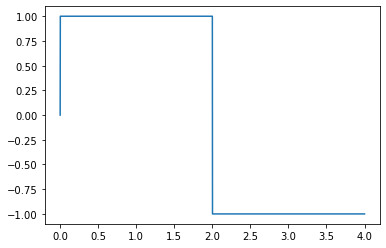

In [20]:
# Select the function to analyze, i.e. rectangular, trapezoidal, or tiangular

# Rectangular function
t = np.linspace(0,4,4001)             # Define time, one period in this example
w0 = 2.0*np.pi/4.0                    # Set fundamental frequency, already known from the period
tau_0 = 2.0*np.pi/w0                  # Set fundamental period

y = (t > 0) - 2 * (t>2)



# Trapezoidal function
# Defined with if/elif/else strucutre 
#
#t = np.linspace(0,4,4000)           # define the time to look at, easiest to just choose 1 period
#w0 = 2*np.pi/t[-1]                  # define the fundamental frequency (here, I know t(end)=tau)
#tau_0 = 2*np.pi/w0                  # define fundamental period based on w0
#
#F0 = 1
#y = np.zeros((len(t),))
#
#for ii in range(len(t)):
#    if t[ii] <= tau_0/3:
#      y[ii] = 3*F0/tau_0*t[ii]
#    elif t[ii] <= 2*tau_0/3:
#       y[ii] = F0
#    else:
#      y[ii] = -3*F0/tau_0*t[ii]+3*F0

# Triangular function
#F0 = 1.0
#y = (F0/2 * t)*(t < 2.0) + (-F0/2 * t + 2 * F0)*(t > 2.0)*(t < 4.0)

plt.plot(t,y)



In [21]:
# Calculation of Fourier terms
#
# Use SciPy trapz command as trapz(y,t)

# Set the number of Fourier terms
num_terms = 9

#  Calculate a0
a0 = w0/(2.0*np.pi)*np.trapz(y,t)  

# Zero padding, good for faster computation  
a = np.zeros((num_terms,))
b = np.zeros((num_terms,))
integral_cos = np.zeros((len(t),num_terms))
integral_sin = np.zeros((len(t),num_terms))
sin_term = np.zeros((num_terms,len(t)))
cos_term = np.zeros((num_terms,len(t)))

# Calculte a_n and b_n from 1 to n using a loop
for n in range(num_terms):

    # Obtin a_n terms
    integral_cos[:,n] = y * np.cos((n+1)*w0*t)         # Function to integrate
    a[n] = w0/np.pi * np.trapz(integral_cos[:,n],t)    # solve for a_n

    # Obtain b_n terms
    integral_sin[:,n] = y * np.sin((n+1)*w0*t)         # Function to integrate
    b[n] = w0/np.pi * np.trapz(integral_sin[:,n],t)    # solve for b_n
    
    sin_term[n,:] = np.sin((n+1)*w0*t)                 # calculate the nth sine term
    cos_term[n,:] = np.cos((n+1)*w0*t)                 # calculate the nth cosine term

# Reconstruct the approximate function by adding the harmonics
approx = np.zeros_like(t) 
for ii in range(len(t)):
     approx[ii] = a0 + np.sum(a * cos_term[:,ii],0) + np.sum(b * sin_term[:,ii],0)

Let´s examine the terms. Note that due numerical integration errors, some terms might not be exactly zero. For example in the rectangular function, the $a_n$ terms should be zero, i.e. only odd components, but this might not be the case.

In [22]:
# Print the Fourier terms
print('\nThe a0 term is {:0.4f}.\n\n'.format(a0))

print('The a_n terms are:')
print('\n  ' + np.array_str(a, precision=4, suppress_small=True))

print('\n\nThe b_n terms are:')
print('\n  ' + np.array_str(b, precision=4, suppress_small=True))


The a0 term is 0.0001.


The a_n terms are:

  [-0.0007  0.0002 -0.0007  0.0002 -0.0007  0.0002 -0.0007  0.0002 -0.0007]


The b_n terms are:

  [ 1.2732  0.      0.4244  0.      0.2546 -0.      0.1819 -0.      0.1415]


[None, None, None, None]

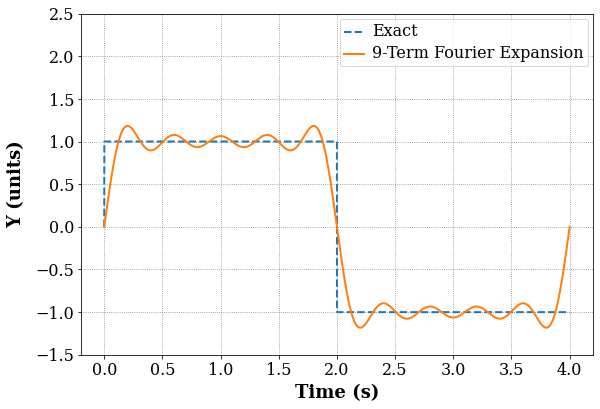

In [23]:
# Plot the results

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Time (s)',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Y (units)',family='serif',fontsize=18,weight='bold',labelpad=10)

plt.plot(t, y, '--', linewidth=2, label=r'Exact')

f = str(num_terms) + '-Term Fourier Expansion'
plt.plot(t, approx, linewidth=2, label=f)

plt.ylim(-1.5,2.5)

leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

